<a href="https://colab.research.google.com/github/carolvieirav/Estatistica_Python/blob/main/Kmeans/Avalia%C3%A7%C3%A3o_de_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('/content/USArrests.csv', index_col=0)

df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


scaler.fit(df)


X_std = scaler.transform(df)

X = X_std

In [6]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(3)

kmeans.fit(X)

kmeans.labels_

array([1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 2, 1, 0, 2, 0, 2, 1, 2, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [9]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
kmeans.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.88515915, -1.0213324 , -0.94990286, -0.92016524],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386]])

In [18]:
kmeans = KMeans(6)

kmeans.fit(X)

kmeans.labels_

array([2, 3, 3, 5, 3, 3, 0, 5, 3, 2, 0, 4, 3, 5, 4, 5, 5, 2, 1, 3, 0, 3,
       4, 2, 5, 4, 4, 3, 4, 0, 3, 3, 2, 1, 5, 5, 5, 5, 0, 2, 1, 2, 3, 0,
       1, 5, 5, 1, 4, 5], dtype=int32)

In [19]:
kmeans.inertia_

45.540868299626396

# Método do Cotovelo

In [22]:
for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    print(kmeans.inertia_)

200.00000000000003
104.96163315756871
80.08569526137276
57.55425863091105
49.99384281326748
45.371352976957816
40.918651922219624
35.31820197836889
32.93340475959702


In [23]:
inertia = []
for n_clusters in range(1,10):
    kmeans = KMeans(n_clusters)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

In [24]:
inertia

[200.00000000000003,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.24189611831617,
 44.29065090781913,
 40.26642841104675,
 36.321682253745266,
 31.60737607531818]

Text(0, 0.5, 'Inércia (Distorção)')

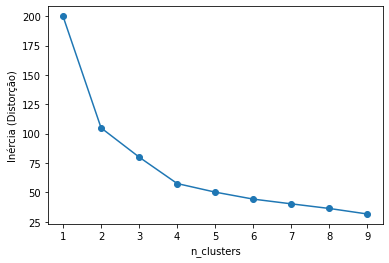

In [27]:
plt.plot(range(1,10), inertia, '-o')
plt.xlabel('n_clusters')
plt.ylabel('Inércia (Distorção)')

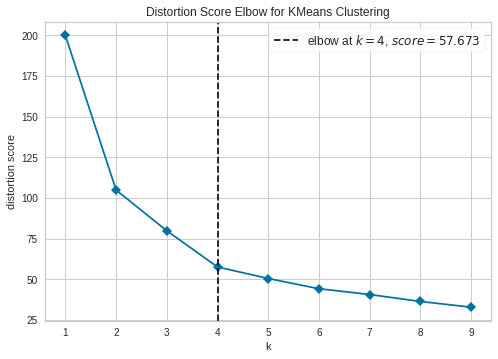

In [31]:
from yellowbrick.cluster import KElbowVisualizer



model = KMeans()


visualizer = KElbowVisualizer(model, k=(1,10), timings=False)

visualizer.fit(X)        # Fit os dados para o visualizer

visualizer.show()        

# Silhueta

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer

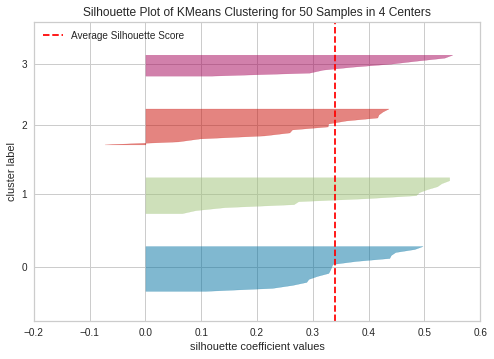

In [34]:
model = KMeans(4).fit(X)


visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)  

visualizer.show()        